Praktek TF-IDF
=============================

***Margareta Valencia (A11.2022.14704)***

In [8]:
import pandas as pd
import numpy as np

In [9]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t')

In [10]:
dataset_feature = dataset['Review'].astype(str)

In [11]:
dataset_feature

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object

In [12]:
dataset.shape

(1000, 2)

In [13]:
dataset

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [14]:
dataset_label = dataset['Liked']
dataset_label

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

# Cek distribusi label

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Acer\AppData\Local\Temp\ipykernel_87184\1470841120.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')


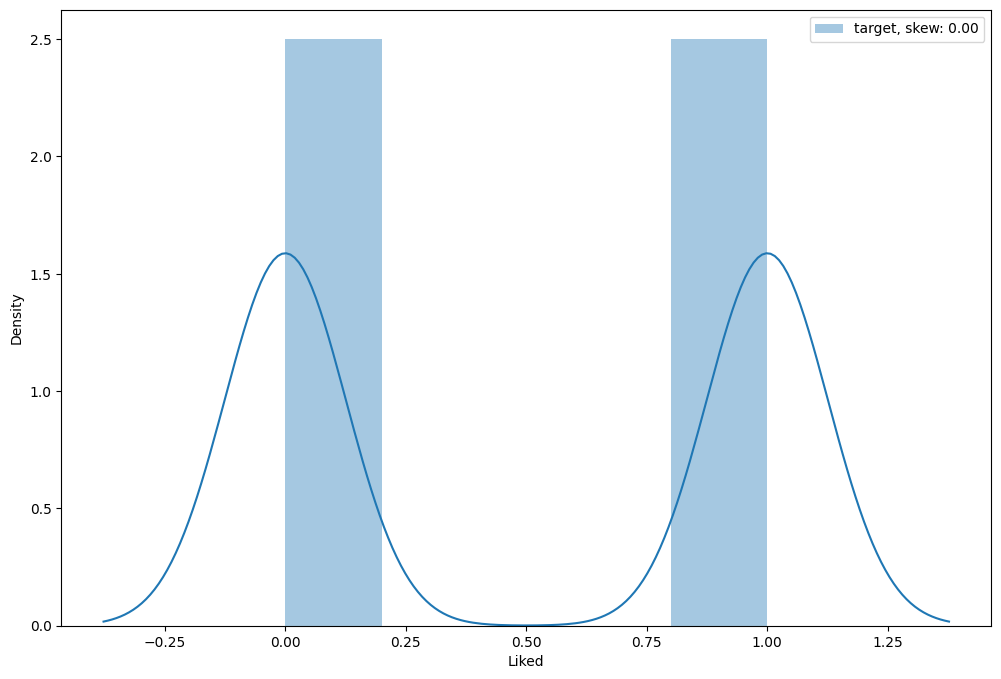

In [16]:
# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

In [17]:
dataset_label.value_counts()

Liked
1    500
0    500
Name: count, dtype: int64

# TF-IDF

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [19]:
vectorizer = TfidfVectorizer()

In [20]:
X = vectorizer.fit_transform(dataset_feature)

In [21]:
print(X.shape)

(1000, 2035)


In [22]:
features = vectorizer.get_feature_names_out()

In [23]:
features

array(['00', '10', '100', ..., 'yum', 'yummy', 'zero'], dtype=object)

In [24]:
idfValues = vectorizer.idf_

In [25]:
d = dict(zip(features, 9 - idfValues))

In [26]:
sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

In [27]:
for i in range(3867):
    print(sortedDict[i])

('the', 7.202712560187457)
('and', 6.908356380647984)
('was', 6.659589724445876)
('to', 6.3007313735262)
('is', 6.115125741531056)
('it', 6.018498905841984)
('this', 5.996519999123208)
('food', 5.8952662654180354)
('of', 5.8952662654180354)
('not', 5.81863303939712)
('for', 5.735636119826152)
('place', 5.735636119826152)
('in', 5.725974208914415)
('good', 5.61303379773382)
('service', 5.545592516938287)
('we', 5.435050642538464)
('my', 5.3817046618331705)
('very', 5.353925097726095)
('with', 5.325351725282038)
('had', 5.310752925860886)
('be', 5.295937840075745)
('so', 5.280899962711205)
('great', 5.265632490580416)
('that', 5.265632490580416)
('but', 5.234379947076312)
('have', 5.234379947076312)
('back', 5.20211908485809)
('are', 5.18558978290688)
('were', 5.18558978290688)
('here', 5.151688231231199)
('at', 5.116596911419929)
('they', 5.116596911419929)
('you', 5.116596911419929)
('on', 5.061537134236901)
('go', 4.897907710455099)
('like', 4.897907710455099)
('time', 4.8524453363783

IndexError: list index out of range

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

In [29]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

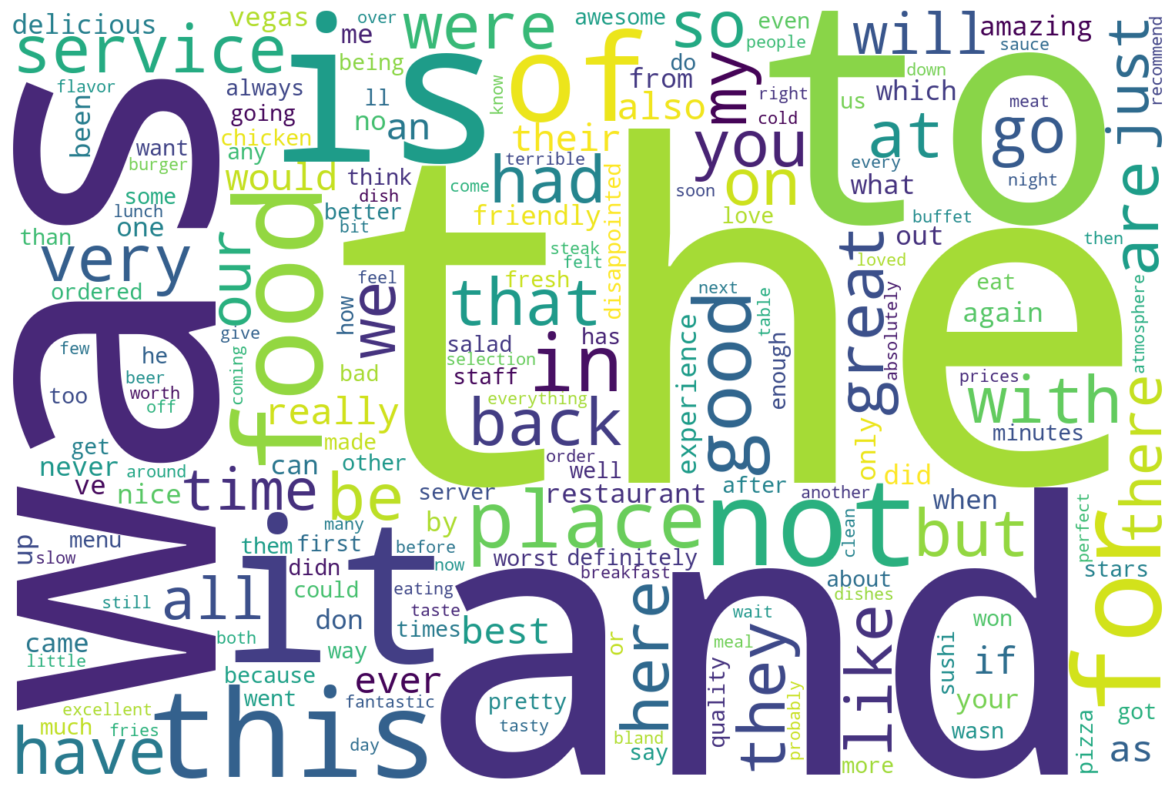

In [30]:
PlotWordCloud(d)